In [2]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('white')

In [3]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)

## Task 1

Create a pie plot for the respondent's age (matplotlib)

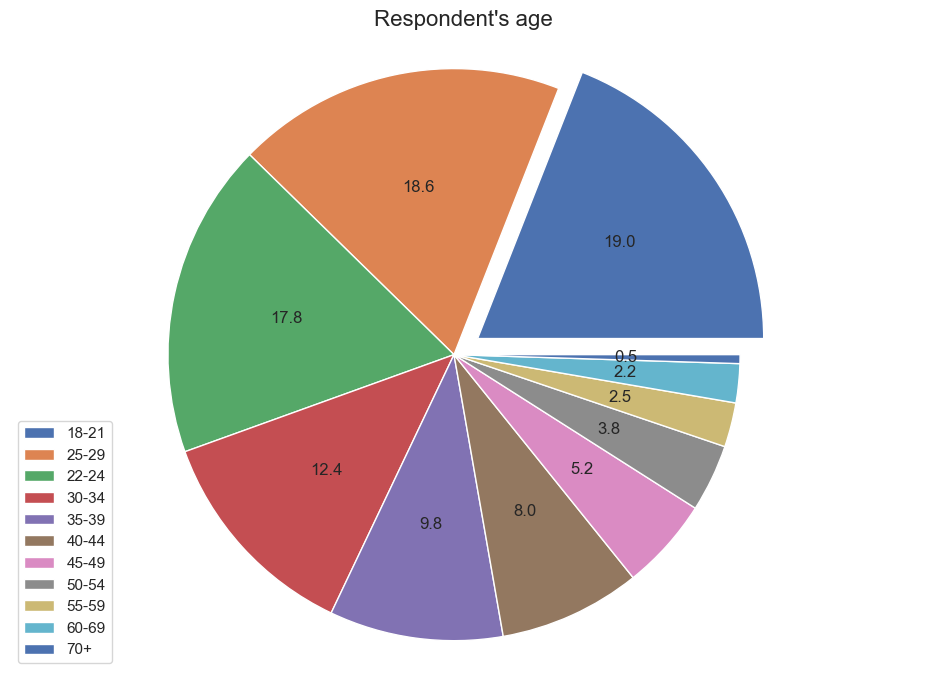

In [4]:
ages = '18-21', '25-29', '22-24', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-69', '70+'
sizes = [19, 18.6, 17.8, 12.4, 9.8, 8, 5.2, 3.8, 2.5, 2.2, 0.5]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
pieplot = ax1.pie(sizes, explode = explode, autopct = '%.1f')
ax1.axis('equal')
plt.legend(ages, loc='lower left')
ax1.set_title("Respondent's age", fontsize=16)
plt.show()

## Task 2

Create a bar plot of the popularity of visualization libraries (seaborn)

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000')])

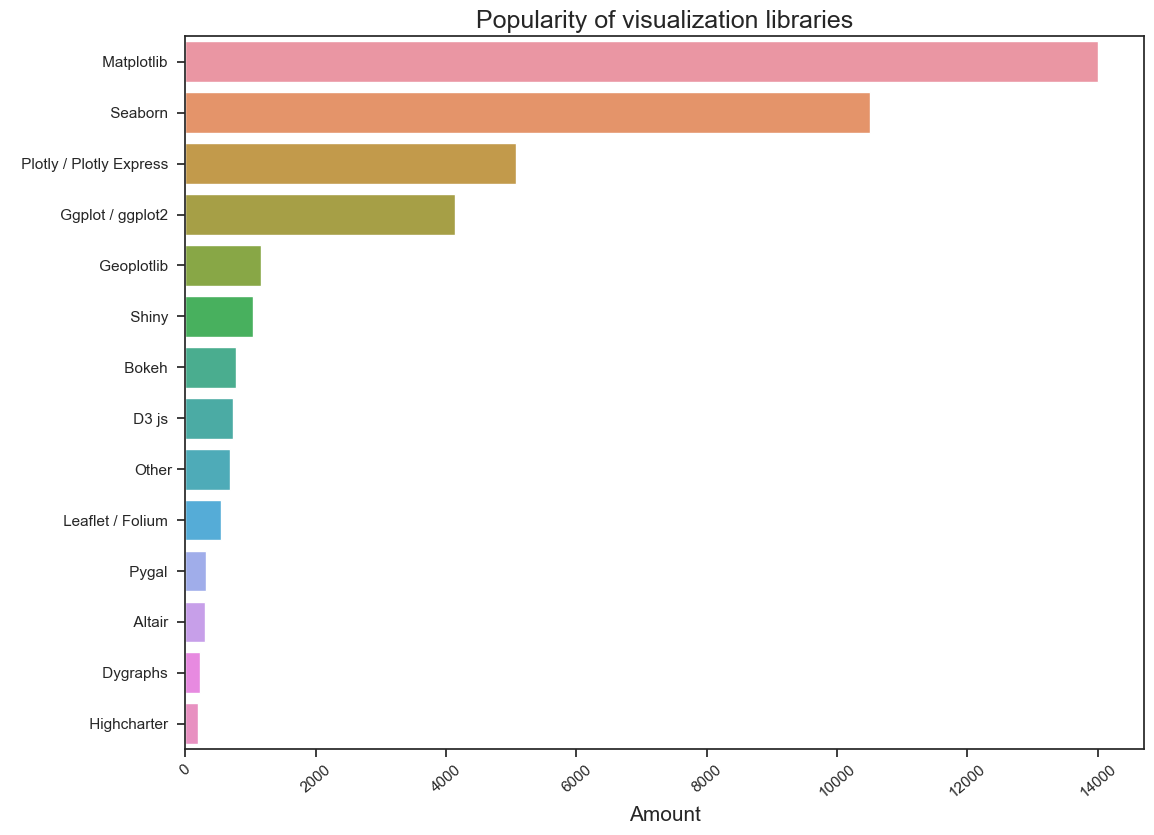

In [6]:
import matplotlib.pyplot as plt
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
data.drop(0, inplace = True)
q15_columns = [col for col in data.columns if col.startswith('Q15')]
libs = data[q15_columns].melt(value_vars=q15_columns)
libs['value counts'] = libs['value'].map(libs['value'].value_counts())
libs = libs.dropna()
libs = libs.mask(libs.eq('None')).dropna()
libs = libs.drop_duplicates()
libs = libs.sort_values('value counts',ascending=False).reset_index()

sns.barplot(x='value counts', y='value', data=libs)

#plt.rcParams['xtick.major.size'] = 5
#plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

plt.xlabel("Amount", size=15)
plt.ylabel(" ", size=1)
plt.title("Popularity of visualization libraries", size=18)
plt.tight_layout()
plt.xticks(rotation=40)

## Task 3

Create a box plot of earnings for different majors (seaborn)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Data Scientist'),
  Text(0, 1, 'Software Engineer'),
  Text(0, 2, 'Research Scientist'),
  Text(0, 3, 'Other'),
  Text(0, 4, 'Developer Advocate'),
  Text(0, 5, 'Data Analyst (Business, Marketing, Financial, Quantitative, etc)'),
  Text(0, 6, 'Data Engineer'),
  Text(0, 7, 'Machine Learning/ MLops Engineer'),
  Text(0, 8, 'Engineer (non-software)'),
  Text(0, 9, 'Teacher / professor'),
  Text(0, 10, 'Statistician'),
  Text(0, 11, 'Manager (Program, Project, Operations, Executive-level, etc)'),
  Text(0, 12, 'Data Administrator'),
  Text(0, 13, 'Data Architect')])

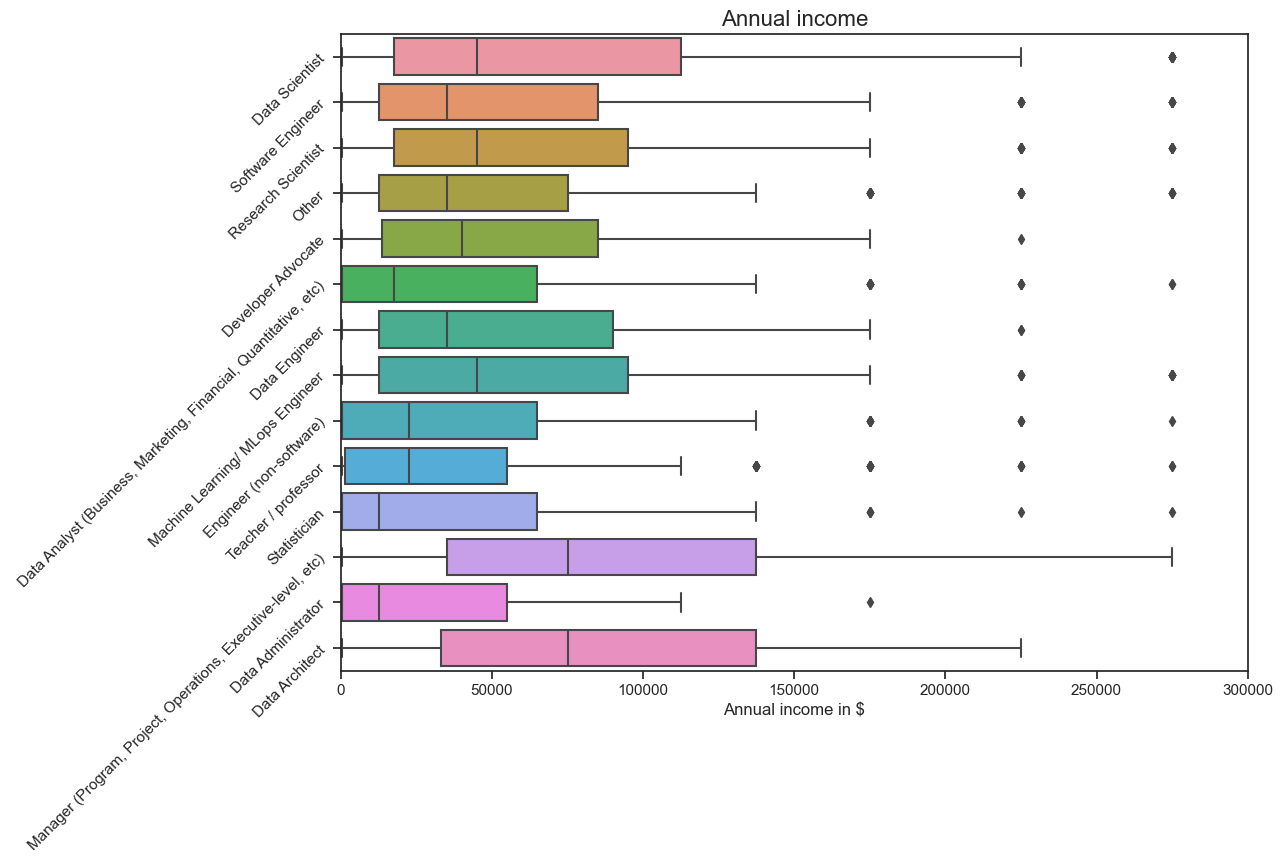

In [7]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
data.drop(0, inplace = True)

sns.set_theme(style='white')
sns.set_style("ticks")

employees_salary = {
'>$1,000,000': 1000000,
'$0-999': 500,'1,000-1,999': 1500,
'10,000-14,999' : 12500, '15,000-19,999': 17500,
'20,000-24,999': 22500, '25,000-29,999': 27500,
'30,000-39,999': 35000, '40,000-49,999': 45000,
'50,000-59,999': 55000, '60,000-69,999': 65000,
'70,000-79,999': 75000, '80,000-89,999': 85000,
'90,000-99,999': 95000, '100,000-124,999' : 112500,
'125,000-149,999': 137500, '150,000-199,999': 175000,
'200,000-249,999': 225000, '250,000-299,999': 275000,
'300,000-499,999': 400000,'$500,000-999,999': 750000
}
data['Salary'] = data['Q29'].map(employees_salary)
employees = data[['Q23', 'Salary']].dropna()

boxplot = sns.boxplot(x = employees['Salary'], y = employees['Q23'], order = ["Data Scientist", "Software Engineer", "Research Scientist", "Other", "Developer Advocate", "Data Analyst (Business, Marketing, Financial, Quantitative, etc)", "Data Engineer", "Machine Learning/ MLops Engineer", "Engineer (non-software)", "Teacher / professor", "Statistician", "Manager (Program, Project, Operations, Executive-level, etc)", "Data Administrator", "Data Architect"])
plt.xlim((0,300000))

boxplot.axes.set_title("Annual income", fontsize=16)
plt.xlabel("Annual income in $", size=12)
plt.ylabel(" ", size=1)
plt.yticks(rotation=45)

# Task 4
Create a bar plot of the distribution of respondents by age: Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, Research Scientist, Software Engineer, Data Architect (seaborn)

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sample = data[['Q23', 'Q2']].dropna()

sample_data_adm = sample[
    sample['Q23'].str.contains('Data Administrator')
]
sample_data_adm = sample_data_adm.sort_values(['Q2'])

sample_data_an = sample[
    sample['Q23'].str.contains('Data Analyst')
]
sample_data_an = sample_data_an.sort_values(['Q2'])

sample_data_eng = sample[
    sample['Q23'].str.contains('Data Engineer')
]
sample_data_eng = sample_data_eng.sort_values(['Q2'])

sample_data_sci = sample[
    sample['Q23'].str.contains('Data Scientist')
]
sample_data_sci = sample_data_sci.sort_values(['Q2'])

sample_eng = sample[
    sample['Q23'].str.contains('Engineer')
]
sample_eng = sample_eng.sort_values(['Q2'])

sample_mlops = sample[
    sample['Q23'].str.contains('MLops Engineer')
]
sample_mlops = sample_mlops.sort_values(['Q2'])

sample_res_sci = sample[
    sample['Q23'].str.contains('Research Scientist')
]
sample_res_sci = sample_res_sci.sort_values(['Q2'])

sample_soft_eng = sample[
    sample['Q23'].str.contains('Software Engineer')
]
sample_soft_eng = sample_soft_eng.sort_values(['Q2'])

sample_data_arch = sample[
    sample['Q23'].str.contains('Data Architect')
]
sample_data_arch = sample_data_arch.sort_values(['Q2'])

fig = make_subplots(rows=3, cols=3, subplot_titles=("<i><b>Data Administrator", "<i><b>Data Analyst", "<i><b>Data Engineer", "<i><b>Data Scientist", "<i><b>Engineer", "<i><b>MLops Engineer", "<i><b>Research Scientist", "<i><b>Software Engineer", "<i><b>Data Architect"))

trace0 = go.Histogram(x=sample_data_adm['Q2'], nbinsx=4, name = 'Data Administrator', legendgroup = '1')
trace1 = go.Histogram(x=sample_data_an['Q2'], nbinsx=4, name = 'Data Analyst', legendgroup = '1')
trace2 = go.Histogram(x=sample_data_eng['Q2'], nbinsx=4, name = 'Data Engineer', legendgroup = '1')
trace3 = go.Histogram(x=sample_data_sci['Q2'], nbinsx=4, name = 'Data Scientist', legendgroup = '1')
trace4 = go.Histogram(x=sample_eng['Q2'], nbinsx=4, name = 'Engineer', legendgroup = '1')
trace5 = go.Histogram(x=sample_mlops['Q2'], nbinsx=4, name = 'MLops Engineer', legendgroup = '1')
trace6 = go.Histogram(x=sample_res_sci['Q2'], nbinsx=4, name = 'Research Scientistr', legendgroup = '1')
trace7 = go.Histogram(x=sample_soft_eng['Q2'], nbinsx=4, name = 'Software Engineer', legendgroup = '1')
trace8 = go.Histogram(x=sample_data_arch['Q2'], nbinsx=4, name = 'Data Architect', legendgroup = '1')

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 1, 3)
fig.append_trace(trace3, 2, 1)
fig.append_trace(trace4, 2, 2)
fig.append_trace(trace5, 2, 3)
fig.append_trace(trace6, 3, 1)
fig.append_trace(trace7, 3, 2)
fig.append_trace(trace8, 3, 3)

#fig.for_each_trace(lambda t: t.update(subplot_titles = '<b>' + t.subplot_titles +'</b>'))

fig.update_layout(height=900, width=1000,
                  title_text="<i>Distribution  of respondents", font=dict(
        size=14
    ))

fig.show()


## Task 5

Create a choropleth map of respondent's countries (seaborn) 

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import pandas as pd
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
#countries_kaggle = pd.read_csv('../datasets/2023_population.csv', low_memory=False)

data.drop(0, inplace = True)

countries = data['Q4'].dropna()
counts = countries.value_counts()

df_value_counts = pd.DataFrame(counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['unique countries', 'people']
df_value_counts = df_value_counts.mask(df_value_counts.eq('I do not wish to disclose my location')).dropna()
df_value_counts = df_value_counts.mask(df_value_counts.eq('Other')).dropna()

country_code = ['IND', 'USA', 'BRA', 'NGA', 'PAK', 'JPN', 'CHN', 'EGY',
               'MEX', 'IDN', 'TUR', 'RUS', 'KOR', 'FRA', 'GBR', 'ESP',
               'CAN', 'COL', 'BGD', 'TWN', 'VNM', 'ARG', 'KEN', 'ITA',
               'MAR', 'AUS', 'THA', 'TUN', 'PER', 'IRN', 'CHL', 'POL',
               'ZAF', 'PHL', 'NLD', 'GHA', 'ISR', 'DEU', 'ETH', 'ARE',
               'PRT', 'SAU', 'UKR', 'LKA', 'NPL', 'MYS', 'SGP', 'CMR',
               'DZA', 'HKG', 'ZWE', 'ECU', 'IRL', 'BEL', 'ROU', 'CZE']

df_value_counts['country code'] = country_code
df_value_counts

fig = go.Figure(data=go.Choropleth(
    locations = df_value_counts['country code'],
    z = df_value_counts['people'],
    text = df_value_counts['people'],
    colorscale = 'agsunset',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'Amount of respondents',
    zmin = 0,
    zmax = 1000
))

fig.update_layout(height=700, width=900,
                  title={
        'text': "World map",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_traces(colorbar_ticks='outside', selector=dict(type='choropleth'))

fig.show()